# PUBG Kaggle Competition

# Data Pre-processing

In [85]:
#Code by Joleena M.
%matplotlib inline

print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split # Used to split the dataset effeciently
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO

#read the csv into a dataframe
df = pd.read_csv('Documents/pubg-seer/pubgdataset/train_V2.csv')

Automatically created module for IPython interactive environment


In [86]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
df.count()

In [87]:
#Drops all objects with NAs
df2 = df.dropna()
df2.count()

Id                 4446965
groupId            4446965
matchId            4446965
assists            4446965
boosts             4446965
damageDealt        4446965
DBNOs              4446965
headshotKills      4446965
heals              4446965
killPlace          4446965
killPoints         4446965
kills              4446965
killStreaks        4446965
longestKill        4446965
matchDuration      4446965
matchType          4446965
maxPlace           4446965
numGroups          4446965
rankPoints         4446965
revives            4446965
rideDistance       4446965
roadKills          4446965
swimDistance       4446965
teamKills          4446965
vehicleDestroys    4446965
walkDistance       4446965
weaponsAcquired    4446965
winPoints          4446965
winPlacePerc       4446965
dtype: int64

In [88]:
#Combines walkDistance, swimDistance, and rideDistance into totalDistance
df2['totalDistance'] = df2['walkDistance'] + df2['swimDistance'] + df2['rideDistance']
df2.head()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,49.7500


In [89]:
#Drops walkDistance, rideDistance, and swimDistance attributes
df3 = df2.drop(columns=['walkDistance', 'rideDistance', 'swimDistance'])
df3.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totalDistance
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,26,-1,0,0,0,0,1,1466,0.4444,244.8000
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,25,1484,0,0,0,0,5,0,0.6400,1445.0445
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,47,1491,0,0,0,0,2,0,0.7755,161.8000
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,30,1408,0,0,0,0,3,0,0.1667,202.7000
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,95,1560,0,0,0,0,2,0,0.1875,49.7500


In [90]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Code for heat map
def plot_correlation_map( df ):
    corr = df3.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 0 }
    )

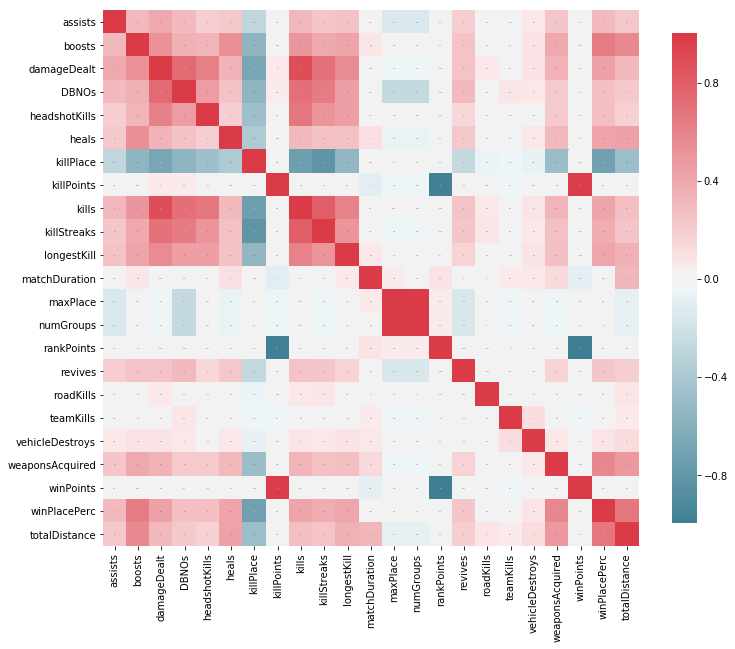

In [91]:
plot_correlation_map( df3 )

In [ ]:
n_features = X.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), df3.columns.values)
plt.xlabel("Feature importance")

In [ ]:
#One hot encodes matchType
#one_hot = pd.get_dummies(df3['matchType'])

In [ ]:
#df3 = df3.drop('matchType',axis = 1)

In [92]:
# PlayersJoined feature
df3['playersJoined'] = df3.groupby('matchId')['matchId'].transform('count')

# Normalized features
df3['killsNorm'] = df3['kills']*((100-df3['playersJoined'])/100 + 1)
df3['damageDealtNorm'] = df3['damageDealt']*((100-df3['playersJoined'])/100 + 1)
df3['maxPlaceNorm'] = df3['maxPlace']*((100-df3['playersJoined'])/100 + 1)
df3['matchDurationNorm'] = df3['matchDuration']*((100-df3['playersJoined'])/100 + 1)
df3['totalDistanceNorm'] = df3['totalDistance']*((100-df3['playersJoined'])/100 + 1)
df3 = df3.drop('matchType',axis = 1)
df3 = df3.drop('Id',axis = 1)
df3 = df3.drop('groupId',axis = 1)
df3 = df3.drop('matchId',axis = 1)
df3 = df3.drop('totalDistance',axis = 1)

In [ ]:
plot_correlation_map( df3 )

In [ ]:
df3.head()

In [93]:
y = df3.pop('winPlacePerc').values
X = df3.values

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.8, random_state=0)

# K-NN Model

In [ ]:
model = KNeighborsRegressor(n_neighbors = 10)

In [ ]:
model.fit( X_train , y_train )

In [ ]:
print (model.score( X_train , y_train ) , model.score( X_valid , y_valid ))

### Making test csv match train csv dimensions

In [ ]:
test = pd.read_csv('Documents/pubg-seer/pubgdataset/test_V2.csv')

#Drops all objects with NAs
test2 = test.dropna()

#Combines walkDistance, swimDistance, and rideDistance into totalDistance
test2['totalDistance'] = test2['walkDistance'] + test2['swimDistance'] + test2['rideDistance']
test3 = test2.drop(columns=['walkDistance', 'rideDistance', 'swimDistance'])



In [ ]:
# PlayersJoined feature
test3['playersJoined'] = test3.groupby('matchId')['matchId'].transform('count')

# Normalized features
test3['killsNorm'] = test3['kills']*((100-test3['playersJoined'])/100 + 1)
test3['damageDealtNorm'] = test3['damageDealt']*((100-test3['playersJoined'])/100 + 1)
test3['maxPlaceNorm'] = test3['maxPlace']*((100-test3['playersJoined'])/100 + 1)
test3['matchDurationNorm'] = test3['matchDuration']*((100-test3['playersJoined'])/100 + 1)
test3['totalDistanceNorm'] = test3['totalDistance']*((100-test3['playersJoined'])/100 + 1)
test3 = test3.drop('matchType',axis = 1)
test3 = test3.drop('groupId',axis = 1)
test3 = test3.drop('matchId',axis = 1)
test3 = test3.drop('totalDistance',axis = 1)
test3.head()

In [ ]:
#Print out predictions.csv
ids = test3['Id']
predictions = model.predict(test3.drop('Id', axis=1))

output = pd.DataFrame({'Id':ids, 'winPlacePerc':predictions})
output.to_csv('predictions.csv',index=False)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
nb.fit( X_train , y_train )

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)

In [96]:
model.fit( X_train , y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Text(0.5,0,'Feature importance')

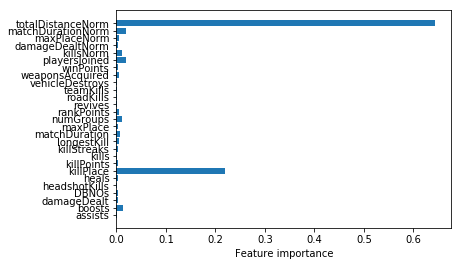

In [97]:
n_features = X.shape[1]
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), df3.columns.values)
plt.xlabel("Feature importance")